In [1]:
import sympy as sp
import numpy as np
from sympy import symbols
sf = sp.SingularityFunction
import matplotlib.pyplot as plt

In [2]:
EI = symbols('EI')
x = symbols('x')

In [3]:
## het oplossen van differentiaal vergelijking

## in x-richting

# Define the symbols
cv, cn, qx, qz, theta = sp.symbols('cv, cn, qx, qz, theta')  ## cv = dv/dx, cn = dn/dx

# Define the equations
eq1 = (qx) + (sp.sin(theta) * cv) + (sp.cos(theta) * cn)
eq2 = (qz) + (sp.cos(theta) * cv) - (sp.sin(theta) * cn)

# Solve the system of equations
solution = sp.solve((eq1, eq2), (cv, cn))

# Display the solution
print("Solution in the x-direction:")
display("dV/dx =", solution[cv])
display("dN/dx =", solution[cn])

Solution in the x-direction:


'dV/dx ='

-qx*sin(theta) - qz*cos(theta)

'dN/dx ='

-qx*cos(theta) + qz*sin(theta)

# Voorbeeld 1

In [4]:
Cv, Cm, Cphi, Cw, Av, Bv, Ah, Cn, Cu = sp.symbols('Cv, Cm, Cphi, Cw, Av, Bv, Ah, Cn, Cu')

# F, l en theta definiëren 
F = 10  ## KN
l = 4   ## m
theta = sp.atan(1/2) 

# qz en qx definiëren
qz = -Av * sf(x, 0, -1) + F * sf(x, l/2, -1) - Bv * sf(x, l, -1)
qx = Ah * sf(x, 0, -1)

In [5]:
# V definiëren als een functie van x
V = sp.integrate(-qx * sp.sin(theta), x) + sp.integrate(-qz * sp.cos(theta), x) + Cv
# N definiëren als een functie van x
N = sp.integrate(-qx * sp.cos(theta), x) + sp.integrate(qz * sp.sin(theta), x) + Cn

In [6]:
# N definiëren als een functie van x
M = sp.integrate(V/sp.cos(theta), x) + Cm

# phi definiëren als een functie van x
phi = sp.integrate(M, x) + Cphi

# W definiëren als een functie van x
W = sp.integrate(-phi, x) + Cw

In [7]:
# u definiëren als een functie van x
u = sp.integrate(N, x) + Cu

In [8]:
display("V:", V)
display("M:", M)
display("phi:", phi)
display("W:", W)
display("N:", N)
display("u:", u)

'V:'

-0.447213595499958*Ah*SingularityFunction(x, 0, 0) + 0.894427190999916*Av*SingularityFunction(x, 0, 0) + 0.894427190999916*Bv*SingularityFunction(x, 4, 0) + Cv - 8.94427190999916*SingularityFunction(x, 2.0, 0)

'M:'

-0.5*Ah*SingularityFunction(x, 0, 1) + 1.0*Av*SingularityFunction(x, 0, 1) + 1.0*Bv*SingularityFunction(x, 4, 1) + Cm + 1.11803398874989*Cv*x - 10.0*SingularityFunction(x, 2.0, 1)

'phi:'

-0.25*Ah*SingularityFunction(x, 0, 2) + 0.5*Av*SingularityFunction(x, 0, 2) + 0.5*Bv*SingularityFunction(x, 4, 2) + Cm*x + Cphi + 0.559016994374947*Cv*x**2 - 5.0*SingularityFunction(x, 2.0, 2)

'W:'

0.0833333333333333*Ah*SingularityFunction(x, 0, 3) - 0.166666666666667*Av*SingularityFunction(x, 0, 3) - 0.166666666666667*Bv*SingularityFunction(x, 4, 3) - Cm*x**2/2 - Cphi*x - 0.186338998124982*Cv*x**3 + Cw + 1.66666666666667*SingularityFunction(x, 2.0, 3)

'N:'

-0.894427190999916*Ah*SingularityFunction(x, 0, 0) - 0.447213595499958*Av*SingularityFunction(x, 0, 0) - 0.447213595499958*Bv*SingularityFunction(x, 4, 0) + Cn + 4.47213595499958*SingularityFunction(x, 2.0, 0)

'u:'

-0.894427190999916*Ah*SingularityFunction(x, 0, 1) - 0.447213595499958*Av*SingularityFunction(x, 0, 1) - 0.447213595499958*Bv*SingularityFunction(x, 4, 1) + Cn*x + Cu + 4.47213595499958*SingularityFunction(x, 2.0, 1)

In [9]:
## Voorwarden

eq1 = V.subs(x, -1)
eq2 = V.subs(x, l+1) 

eq3 = M.subs(x, 0)
eq4 = M.subs(x, l)

eq5 = W.subs(x, l)
eq6 = W.subs(x, 0)

eq7 = N.subs(x, -1)
eq8 = N.subs(x, l+1)

eq9 = u.subs(x, 0)

equations = [eq1 -0, eq2-0,eq3-0,eq4-0,eq5-0,eq6-0, eq7-0, eq8 -0, eq9 - 0]
solutions = sp.solve(equations, (Cv, Cm, Cphi, Cw, Av, Bv, Ah, Cn, Cu))

In [10]:
print(solutions)

{Cv: 0.0, Cm: 0.0, Cphi: -10.0000000000000, Cw: 0.0, Av: 5.00000000000000, Bv: 5.00000000000000, Ah: 0.0, Cn: 0.0, Cu: 0.0}


In [11]:
l/sp.cos(theta)

4.47213595499958

In [12]:
x_val = np.linspace(0, 4.47213595499958, 901)
V_numpy = sp.lambdify(x,V.subs(solutions).rewrite(sp.Piecewise).simplify()) #substitute full solution, make python function of formula
V_list = V_numpy(x_val)
#print(V_list)

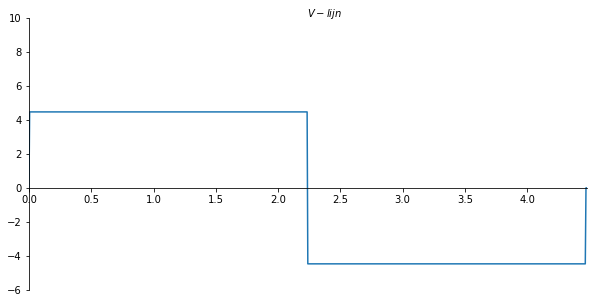

In [13]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 4.48)
ax.set_ylim(-6, 10)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$V-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta), np.array(V_list) , label='V-lijn')
plt.savefig('V_lijnvoorbeeld1', dpi=450);

In [14]:
x_val = np.linspace(0, l, 901)
M_numpy = sp.lambdify(x,M.subs(solutions).rewrite(sp.Piecewise).simplify()) #substitute full solution, make python function of formula
M_list = M_numpy(x_val)
#print(M_list)

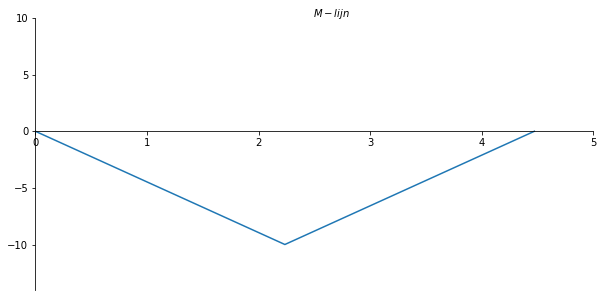

In [15]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 5)
ax.set_ylim(-14, 10)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$M-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta), - np.array(M_list) , label='M-lijn');
plt.savefig('M_lijnvoorbeeld1', dpi=450);

In [16]:
x_val = np.linspace(0, l, 901)
phi_numpy = sp.lambdify(x,phi.subs(solutions).rewrite(sp.Piecewise).simplify()) #substitute full solution, make python function of formula
phi_list = phi_numpy(x_val)

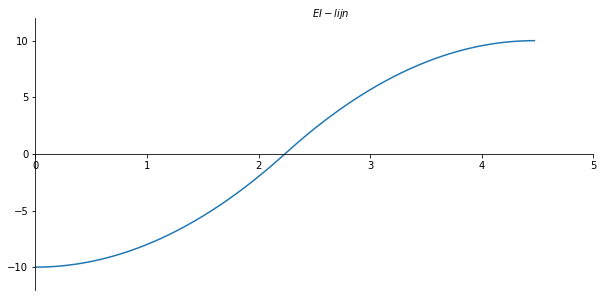

In [17]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 5)
ax.set_ylim(-12, 12)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$EI-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta), np.array(phi_list) , label='phi-lijn')
plt.savefig('phi_lijnvoorbeeld1', dpi=450);

In [18]:
x_val = np.linspace(0, l, 901)
W_numpy = sp.lambdify(x,W.subs(solutions).rewrite(sp.Piecewise).simplify()) #substitute full solution, make python function of formula
W_list = W_numpy(x_val)

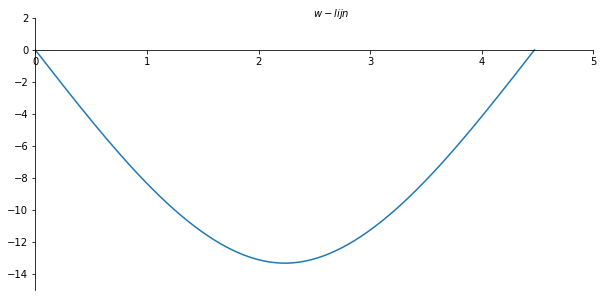

In [19]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 5)
ax.set_ylim(-15, 2)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$w-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta), - np.array(W_list) , label='w-lijn')
plt.savefig('w_lijnvoorbeeld1', dpi=450);

In [20]:
x_val = np.linspace(0,  4.47213595499958, 901)
N_numpy = sp.lambdify(x,N.subs(solutions).rewrite(sp.Piecewise).simplify()) #substitute full solution, make python function of formula
N_list = N_numpy(x_val)

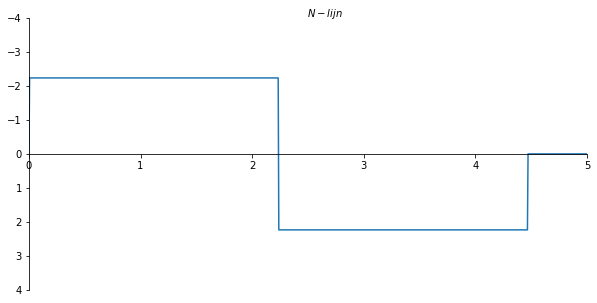

In [21]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 5)
ax.set_ylim(4, -4)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$N-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta),  np.array(N_list) , label='N-lijn')
plt.savefig('N_lijnvoorbeeld1', dpi=450);

In [22]:
x_val = np.linspace(0, l, 301)
u_numpy = sp.lambdify(x,u.subs(solutions).rewrite(sp.Piecewise).simplify()) #substitute full solution, make python function of formula
u_list = u_numpy(x_val)

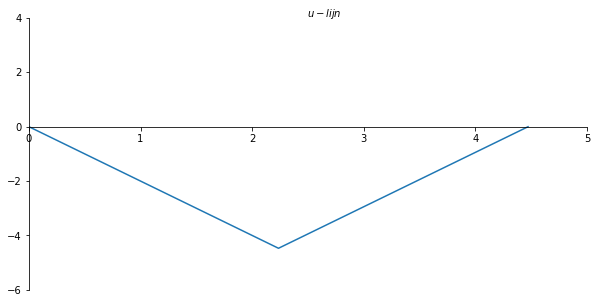

In [23]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 5)
ax.set_ylim(-6, 4)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$u-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta),  np.array(u_list) , label='u-lijn');

# Voorbeeld 2

In [24]:
Cv, Cm, Cphi, Cw, Av, MA, Ah, Cn, Cu = sp.symbols('Cv, Cm, Cphi, Cw, Av, MA, Ah, Cn, Cu')

# F, l en theta definiëren 
F = 10  ## KN
l = 4   ## m
theta = sp.atan(1/2) 

# qz en qx definiëren
qz = -Av * sf(x, 0, -1) + MA * sf(x, 0, -2) + F * sf(x, l, -1)
qx = Ah * sf(x, 0, -1) - F * sf(x, l, -1)

In [25]:
# V definiëren als een functie van x
V = sp.integrate(-qx * sp.sin(theta), x) + sp.integrate(-qz * sp.cos(theta), x) + Cv
# N definiëren als een functie van x
N = sp.integrate(-qx * sp.cos(theta), x) + sp.integrate(qz * sp.sin(theta), x) + Cn

In [26]:
# N definiëren als een functie van x
M = sp.integrate(V/sp.cos(theta), x) + Cm

# phi definiëren als een functie van x
phi = sp.integrate(M, x) + Cphi

# W definiëren als een functie van x
W = sp.integrate(-phi, x) + Cw

In [27]:
# u definiëren als een functie van x
u = sp.integrate(N, x) + Cu

In [28]:
display("V:", V)
display("M:", M)
display("phi:", phi)
display("W:", W)
display("N:", N)
display("u:", u)

'V:'

-0.447213595499958*Ah*SingularityFunction(x, 0, 0) + 0.894427190999916*Av*SingularityFunction(x, 0, 0) + Cv - 0.894427190999916*MA*SingularityFunction(x, 0, -1) - 4.47213595499958*SingularityFunction(x, 4, 0)

'M:'

-0.5*Ah*SingularityFunction(x, 0, 1) + 1.0*Av*SingularityFunction(x, 0, 1) + Cm + 1.11803398874989*Cv*x - 1.0*MA*SingularityFunction(x, 0, 0) - 5.0*SingularityFunction(x, 4, 1)

'phi:'

-0.25*Ah*SingularityFunction(x, 0, 2) + 0.5*Av*SingularityFunction(x, 0, 2) + Cm*x + Cphi + 0.559016994374947*Cv*x**2 - 1.0*MA*SingularityFunction(x, 0, 1) - 2.5*SingularityFunction(x, 4, 2)

'W:'

0.0833333333333333*Ah*SingularityFunction(x, 0, 3) - 0.166666666666667*Av*SingularityFunction(x, 0, 3) - Cm*x**2/2 - Cphi*x - 0.186338998124982*Cv*x**3 + Cw + 0.5*MA*SingularityFunction(x, 0, 2) + 0.833333333333333*SingularityFunction(x, 4, 3)

'N:'

-0.894427190999916*Ah*SingularityFunction(x, 0, 0) - 0.447213595499958*Av*SingularityFunction(x, 0, 0) + Cn + 0.447213595499958*MA*SingularityFunction(x, 0, -1) + 13.4164078649987*SingularityFunction(x, 4, 0)

'u:'

-0.894427190999916*Ah*SingularityFunction(x, 0, 1) - 0.447213595499958*Av*SingularityFunction(x, 0, 1) + Cn*x + Cu + 0.447213595499958*MA*SingularityFunction(x, 0, 0) + 13.4164078649987*SingularityFunction(x, 4, 1)

In [29]:
## Voorwarden

eq1 = V.subs(x, -1)
eq2 = V.subs(x, l+0.1) 

eq3 = M.subs(x, -1)
eq4 = M.subs(x, l)

eq5 = phi.subs(x, 0)
eq6 = W.subs(x, 0)

eq7 = N.subs(x, -1)
eq8 = N.subs(x, l+0.1)


equations = [eq1 -0, eq2-0,eq3-0,eq4-0,eq5-0,eq6-0, eq7-0, eq8 -0]
solutions = sp.solve(equations, (Cv, Cm, Cphi, Cw, Av, MA, Ah, Cn))

In [30]:
print(solutions)

{Cv: 0.0, Cm: 0.0, Cphi: 0.0, Cw: 0.0, Av: 9.99999999999998, MA: 20.0000000000000, Ah: 9.99999999999996, Cn: 0.0}


V-lijn

In [31]:
x_val = np.linspace(0, 4.47213595499958, 901)
V_numpy = sp.lambdify(x,V.subs(solutions).rewrite(sp.Piecewise).simplify()) #substitute full solution, make python function of formula
V_list = V_numpy(x_val)
#print(V_list)

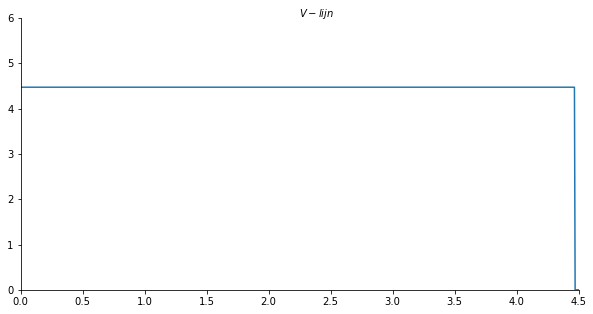

In [32]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 4.5)
ax.set_ylim(0, 6)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$V-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta), np.array(V_list) , label='V-lijn')
plt.savefig('V_lijnvoorbeeld2', dpi=450);

In [33]:
x_val = np.linspace(0, l, 901)
M_numpy = sp.lambdify(x,M.subs(solutions).rewrite(sp.Piecewise).simplify()) #substitute full solution, make python function of formula
M_list = M_numpy(x_val)

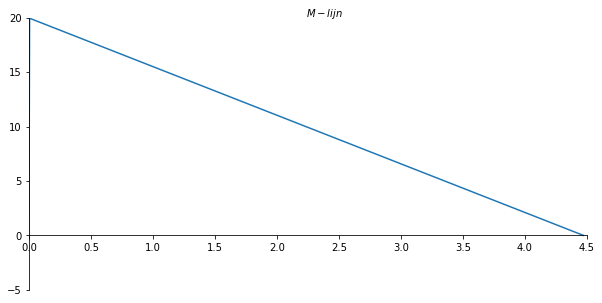

In [34]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 4.5)
ax.set_ylim(-5, 20)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$M-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta), - np.array(M_list) , label='M-lijn');
plt.savefig('M_lijnvoorbeeld2', dpi=450);

In [35]:
x_val = np.linspace(0, l, 901)
phi_numpy = sp.lambdify(x,phi.subs(solutions).rewrite(sp.Piecewise).simplify()) #substitute full solution, make python function of formula
phi_list = phi_numpy(x_val)

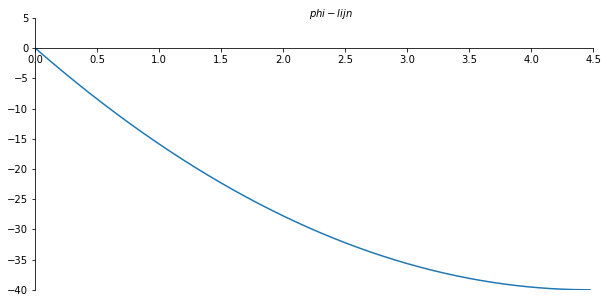

In [36]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 4.5)
ax.set_ylim(-40, 5)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$phi-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta), np.array(phi_list) , label='phi-lijn')
plt.savefig('phi_lijnvoorbeeld2', dpi=450);

w-lijn

In [37]:
x_val = np.linspace(0, l, 901)
W_numpy = sp.lambdify(x,W.subs(solutions).rewrite(sp.Piecewise).simplify()) #substitute full solution, make python function of formula
W_list = W_numpy(x_val)

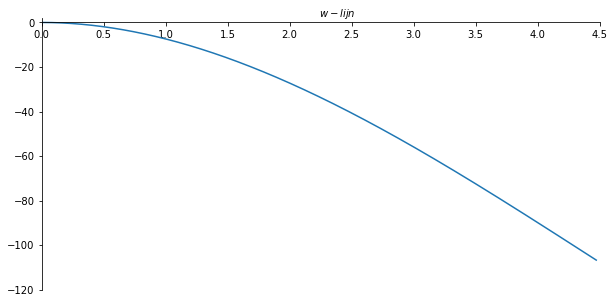

In [38]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 4.5)
ax.set_ylim(-120, 2)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$w-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta), - np.array(W_list) , label='w-lijn')
plt.savefig('w_lijnvoorbeeld2', dpi=450);

N-lijn

In [39]:
x_val = np.linspace(0, 4.47213595499958, 901)
N_numpy = sp.lambdify(x,N.subs(solutions).rewrite(sp.Piecewise).simplify()) #substitute full solution, make python function of formula
N_list = N_numpy(x_val)

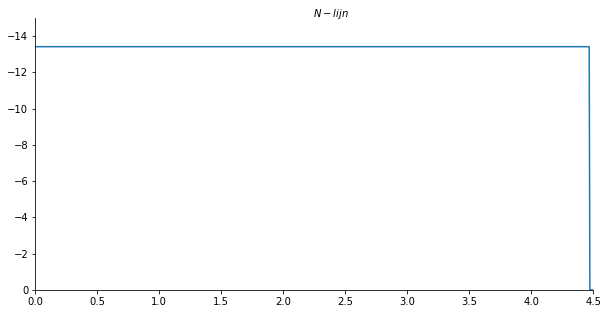

In [40]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 4.5)
ax.set_ylim(0, -15)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)

ax.set_xlabel("$N-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta),  np.array(N_list) , label='N-lijn')
plt.savefig('N_lijnvoorbeeld2', dpi=450);

# Voorbeeld 3

In [41]:
Cv, Cm, Cphi, Cw, Av, Bv, Ah, Cn, MA = sp.symbols('Cv, Cm, Cphi, Cw, Av, Bv, Ah, Cn, MA')

# F, l en theta definiëren 
F = 10  ## KN
l = 4   ## m
T = 10 
theta = sp.atan(1/2) 

# qz en qx definiëren
qz = -Av * sf(x, 0, -1) + MA*sf(x, 0, -2) - Bv * sf(x, l, -1) + T *sf(x, l/4, -2)
qx = Ah * sf(x, 0, -1) -F*sf(x, l/2, -1)

In [42]:
# V definiëren als een functie van x
V = sp.integrate(-qx * sp.sin(theta), x) + sp.integrate(-qz * sp.cos(theta), x) + Cv
# N definiëren als een functie van x
N = sp.integrate(-qx * sp.cos(theta), x) + sp.integrate(qz * sp.sin(theta), x) + Cn

In [43]:
# N definiëren als een functie van x
M = sp.integrate(V/sp.cos(theta), x) + Cm

# phi definiëren als een functie van x
phi = sp.integrate(M, x) + Cphi

# W definiëren als een functie van x
W = sp.integrate(-phi, x) + Cw

In [44]:
# u definiëren als een functie van x
u = sp.integrate(N, x) + Cu

In [45]:
display("V:", V)
display("M:", M)
display("phi:", phi)
display("W:", W)
display("N:", N)
display("u:", u)

'V:'

-0.447213595499958*Ah*SingularityFunction(x, 0, 0) + 0.894427190999916*Av*SingularityFunction(x, 0, 0) + 0.894427190999916*Bv*SingularityFunction(x, 4, 0) + Cv - 0.894427190999916*MA*SingularityFunction(x, 0, -1) - 8.94427190999916*SingularityFunction(x, 1.0, -1) + 4.47213595499958*SingularityFunction(x, 2.0, 0)

'M:'

-0.5*Ah*SingularityFunction(x, 0, 1) + 1.0*Av*SingularityFunction(x, 0, 1) + 1.0*Bv*SingularityFunction(x, 4, 1) + Cm + 1.11803398874989*Cv*x - 1.0*MA*SingularityFunction(x, 0, 0) - 10.0*SingularityFunction(x, 1.0, 0) + 5.0*SingularityFunction(x, 2.0, 1)

'phi:'

-0.25*Ah*SingularityFunction(x, 0, 2) + 0.5*Av*SingularityFunction(x, 0, 2) + 0.5*Bv*SingularityFunction(x, 4, 2) + Cm*x + Cphi + 0.559016994374947*Cv*x**2 - 1.0*MA*SingularityFunction(x, 0, 1) - 10.0*SingularityFunction(x, 1.0, 1) + 2.5*SingularityFunction(x, 2.0, 2)

'W:'

0.0833333333333333*Ah*SingularityFunction(x, 0, 3) - 0.166666666666667*Av*SingularityFunction(x, 0, 3) - 0.166666666666667*Bv*SingularityFunction(x, 4, 3) - Cm*x**2/2 - Cphi*x - 0.186338998124982*Cv*x**3 + Cw + 0.5*MA*SingularityFunction(x, 0, 2) + 5.0*SingularityFunction(x, 1.0, 2) - 0.833333333333333*SingularityFunction(x, 2.0, 3)

'N:'

-0.894427190999916*Ah*SingularityFunction(x, 0, 0) - 0.447213595499958*Av*SingularityFunction(x, 0, 0) - 0.447213595499958*Bv*SingularityFunction(x, 4, 0) + Cn + 0.447213595499958*MA*SingularityFunction(x, 0, -1) + 4.47213595499958*SingularityFunction(x, 1.0, -1) + 8.94427190999916*SingularityFunction(x, 2.0, 0)

'u:'

-0.894427190999916*Ah*SingularityFunction(x, 0, 1) - 0.447213595499958*Av*SingularityFunction(x, 0, 1) - 0.447213595499958*Bv*SingularityFunction(x, 4, 1) + Cn*x + Cu + 0.447213595499958*MA*SingularityFunction(x, 0, 0) + 4.47213595499958*SingularityFunction(x, 1.0, 0) + 8.94427190999916*SingularityFunction(x, 2.0, 1)

In [46]:
eq1 = V.subs(x, -1)
eq2 = V.subs(x, l+1) 

eq3 = M.subs(x, -1)
eq4 = M.subs(x, l)

eq5 = W.subs(x, 0)
eq6 = phi.subs(x, 0)

eq7 = N.subs(x, -1)
eq8 = W.subs(x, l)
eq9 = N.subs(x, l+1)

equations = [eq1 - 0, eq2 - 0 , eq3 - 0, eq4 - 0, eq5 - 0, eq6 - 0, eq7 - 0, eq8 -0, eq9 - 0]
solutions = sp.solve(equations, (Cv, Cm, Cphi, Cw, Av, MA, Cn, Ah, Bv))

In [47]:
print(solutions)

{Cv: 0.0, Cm: 0.0, Cphi: 0.0, Cw: 0.0, Av: 3.20312500000000, MA: -7.18750000000000, Cn: 0.0, Ah: 10.0000000000000, Bv: -3.20312500000000}


In [48]:
x_val = np.linspace(0, 4.4721359549995, 901)
V_numpy = sp.lambdify(x,V.subs(solutions).rewrite(sp.Piecewise).simplify()) #substitute full solution, make python function of formula
V_list = V_numpy(x_val)

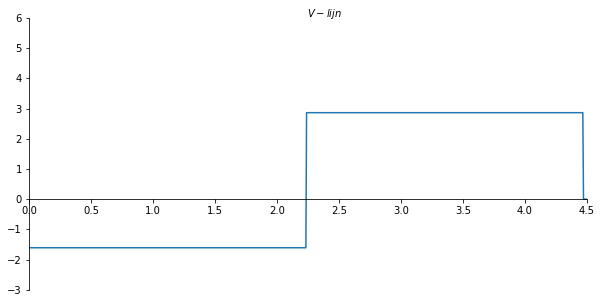

In [49]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 4.5)
ax.set_ylim(-3, 6)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$V-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta), np.array(V_list) , label='V-lijn')
plt.savefig('V_lijnvoorbeeld3', dpi=450);

In [50]:
x_val = np.linspace(0, l, 901)
M_numpy = sp.lambdify(x,M.subs(solutions).rewrite(sp.Piecewise).simplify()) 
M_list = M_numpy(x_val)

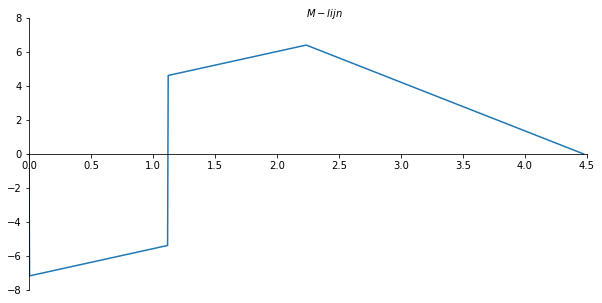

In [51]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 4.5)
ax.set_ylim(-8, 8)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$M-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta),  -np.array(M_list) , label='M-lijn');
plt.savefig('M_lijnvoorbeeld3', dpi=450);

In [52]:
x_val = np.linspace(0, l, 901)
phi_numpy = sp.lambdify(x,phi.subs(solutions).rewrite(sp.Piecewise).simplify()) #substitute full solution, make python function of formula
phi_list = phi_numpy(x_val)

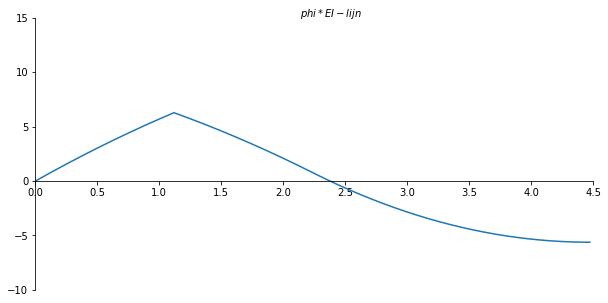

In [53]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 4.5)
ax.set_ylim(-10, 15)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$phi*EI-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta), np.array(phi_list) , label='phi-lijn')
plt.savefig('phi_lijnvoorbeeld3', dpi=450);

In [54]:
x_val = np.linspace(0, l, 901)
W_numpy = sp.lambdify(x,W.subs(solutions).rewrite(sp.Piecewise).simplify()) #substitute full solution, make python function of formula
W_list = W_numpy(x_val)

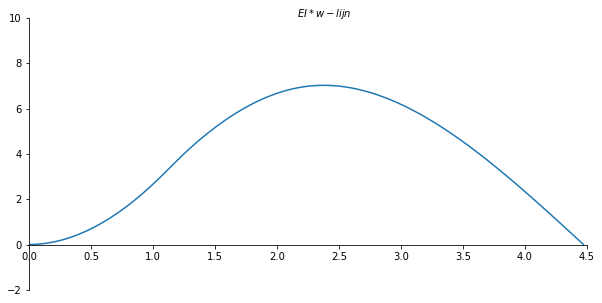

In [55]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 4.5)
ax.set_ylim(-2, 10)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$EI * w-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta), - np.array(W_list) , label='w-lijn')
plt.savefig('w_lijnvoorbeeld3', dpi=450);

In [56]:
x_val = np.linspace(0, 4.47213595499958, 901)
N_numpy = sp.lambdify(x,N.subs(solutions).rewrite(sp.Piecewise).simplify()) #substitute full solution, make python function of formula
N_list = N_numpy(x_val)

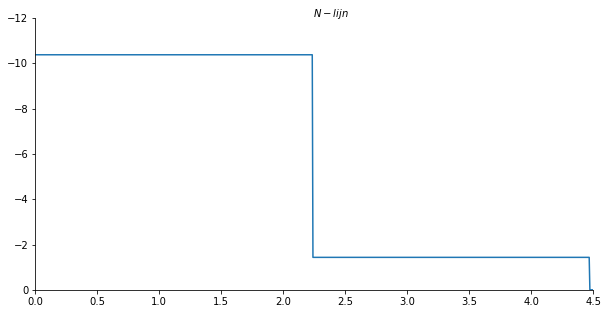

In [57]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 4.5)
ax.set_ylim(0, -12)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)

ax.set_xlabel("$N-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta),  np.array(N_list) , label='N-lijn')
plt.savefig('N_lijnvoorbeeld3', dpi=450);

# Geknikte staven

### Voorbeeld 4

#### Benadering

In [58]:
x, Cv, Cm, Cphi, Cw, Av, Bv, MA, Ah, Cn= sp.symbols('x, C_v, C_m, C_phi, C_w, A_v, B_v, M_A, A_h, C_n')

l = 4
F1 = 10
F2 = 10

theta = sp.atan(0.25)
alpha = sp.atan(0.5)

In [59]:
## Krachtenvergelijking van staaf 1
qz1 = sp.nsimplify(-Av * sf(x, 0, -1) + MA* sf(x, 0, -2) + F1 *sf(x, l/2, -1))
qx1 = sp.nsimplify(Ah * sf(x, 0, -1))

In [60]:
## Krachtenvergelijking van staaf 2

qz2 = sp.nsimplify(-Bv * sf(x, (3/2)*l, -1) + F2 *sf(x, (5/4)*l, -1))
qx2 = 0

In [61]:
## V = V1 + V2 
## Dwarskracht in de eerste staaf 
V1 = sp.integrate(-qx1 * sp.sin(theta), x) + sp.integrate(-qz1 * sp.cos(theta), x)
## Dwasrkracht in de tweede staaf
V2 = sp.integrate(-qx2 * sp.sin(alpha), x) + sp.integrate(-qz2 * sp.cos(alpha), x)

V = V1 + V2 + Cv

In [62]:
## N = N1 + N2 
## Normaalkracht in de eerste staaf
N1 = sp.integrate(-qx1 * sp.cos(theta), x) + sp.integrate(qz1 * sp.sin(theta), x)
## Normaalkracht in de tweedee staaf
N2 = sp.integrate(-qx2 * sp.cos(alpha), x) + sp.integrate(qz2 * sp.sin(alpha), x)
N = N1 + N2 + Cn

In [63]:
M1 = sp.integrate(V1/sp.cos(theta), x)
M2 = sp.integrate(V2/sp.cos(alpha), x)
M = M1 + M2 + Cm
phi = sp.integrate(M, x) + Cphi
W = sp.integrate(phi, x) + Cw

In [64]:
eq1 = V.subs(x, -1)
eq2 = M.subs(x, -1)
eq3 = V.subs(x, (3/2)*l + 1)

eq4 = phi.subs(x, 0)
eq5 = W.subs(x, 0)

eq6 = M.subs(x, (3/2)*l)
eq7 = W.subs(x, (3/2)*l )

eq8 = N.subs(x, -0.01)
eq9 = N.subs(x, ((3/2)*l) )

equations = [eq1-0, eq2-0, eq3-0, eq4-0, eq5-0, eq6-0, eq7 -0, eq8-0, eq9-0]
solutions = sp.solve(equations, (Cn, Cm, Cphi, Cw, Av, Bv, MA, Cv, Ah))

In [65]:
display(solutions)

{C_n: 0.0,
 C_m: 0.0,
 C_phi: 0.0,
 C_w: 0.0,
 A_v: 11.0539215686274,
 B_v: 8.92036924928217,
 M_A: 15.9722222222222,
 C_v: 0.0,
 A_h: 0.234204793028313}

[0.9656511 0.9656511]


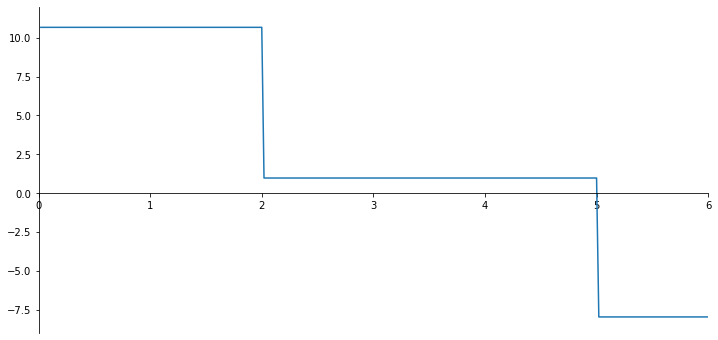

In [66]:
x_val = np.linspace(0, 3*l/2, 301)
V_numpy = sp.lambdify(x,V.subs(solutions).rewrite(sp.Piecewise).simplify())
V_list = V_numpy(x_val)

print(V_list[200:202])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 6)
ax.set_ylim(-9, 12)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)

ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val, np.array(V_list));

[-0.48282555 -0.48282555]


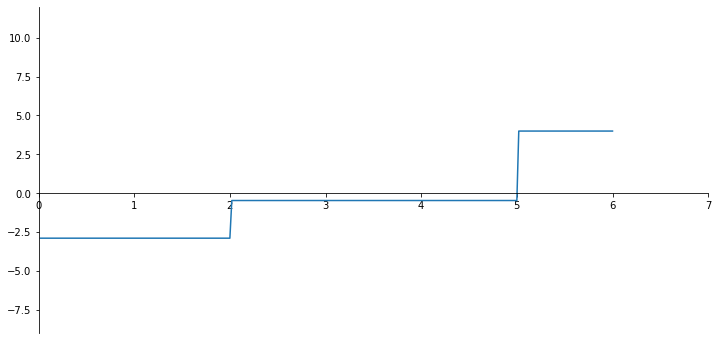

In [67]:
x_val = np.linspace(0, 3*l/2, 301)
N_numpy = sp.lambdify(x,N.subs(solutions).rewrite(sp.Piecewise).simplify()) 
N_list = N_numpy(x_val)

print(N_list[200:202])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 7)
ax.set_ylim(-9, 12)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)

ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val, np.array(N_list)); 

### Iteratie 1

In [68]:
Cv, Cm, Cphi, Cw, Av, Bv, MA, Ah, Cn= sp.symbols('C_v, C_m, C_phi, C_w, A_v, B_v, M_A, A_h, C_n')

# Define qz and qx
DwaL =  0.9656511
DwaR =  0.9656511
NorL = -0.48282555
NorR = -0.48282555
qz1 = sp.nsimplify(-Av * sf(x, 0, -1) + MA* sf(x, 0, -2) + F1 *sf(x, l/2, -1) + DwaL * sf(x, l, -1) * sp.cos(theta)- NorL * sf(x, l, -1) * sp.sin(theta))
qz2 = sp.nsimplify(-Bv * sf(x, (3/2)*l, -1) + F2 *sf(x, (5/4)*l, -1) - DwaR *sf(x, l, -1)* sp.cos(alpha) + NorR * sf(x, l, -1)* sp.sin(alpha) )
qx1 = sp.nsimplify(Ah * sf(x, 0, -1) + DwaL * sf(x, l, -1) * sp.sin(theta)  + NorL * sf(x, l, -1)* sp.cos(theta))
qx2 = sp.nsimplify(-DwaR * sf(x, l, -1)*sp.sin(alpha) -NorR * sf(x, l, -1)* sp.cos(alpha))


# Define V as a function of x
## staaf 1
V1 = sp.cos(theta) * sp.integrate( -qz1 , x)
V2 = sp.integrate(- (sp.sin(theta) * sp.tan(theta) * qx1), x)
## staaf 2
V3 = sp.cos(alpha) * sp.integrate( -qz2 , x)
V4 = sp.integrate(- (sp.sin(alpha) * sp.tan(alpha) * qx2), x)

V =V1 + V2 + V3 + V4 + Cv

# Define M as an integral of V
## staaf 1
M1 = sp.integrate( (V1  / sp.cos(theta)), x)
M2 = sp.integrate( (V2  / sp.cos(theta)), x)
## sfaaf 2
M3 = sp.integrate((V3 / sp.cos(alpha)), x)
M4 = sp.integrate((V4 / sp.cos(alpha)), x)
M  = M1 + M2 + M3+ M4 + Cm

# Define phi as an integral of M
phi = sp.integrate(M, x) + Cphi

# Define W as an integral of -phi
W = sp.integrate(-phi, x) + Cw

N1 = sp.integrate(sp.sin(theta) * (-qx1 + qz1), x) + Cn
N2 = sp.integrate(sp.sin(alpha) * (-qx2 + qz2), x) 
N = N1+ N2 +Cn

In [69]:
eq1 = V.subs(x, -1)
eq2 = M.subs(x, -1)
eq3 = V.subs(x, (3/2)*l + 1)
eq4 = phi.subs(x, 0)
eq5 = W.subs(x, 0)
eq6 = M.subs(x, (3/2)*l)
eq7 = W.subs(x, (3/2)*l)
eq8 = N.subs(x, -0.01)
eq9 = N.subs(x, ((3/2)*l) +1 )
equations = [eq1-0, eq2-0, eq3-0, eq4-0, eq5-0, eq6-0, eq7 -0, eq8-0, eq9-0]
solutions = sp.solve(equations, (Cv, Cm, Cphi, Cw, Av, Bv, MA, Cn, Ah))
display(solutions)

{C_v: 0.0,
 C_m: 0.0,
 C_phi: 0.0,
 C_w: 0.0,
 A_v: 10.9868559793420,
 B_v: 8.98907082505678,
 M_A: 15.9363582385174,
 C_n: 0.0,
 A_h: 0.174590935654146}

[0.9468048  0.90420254]


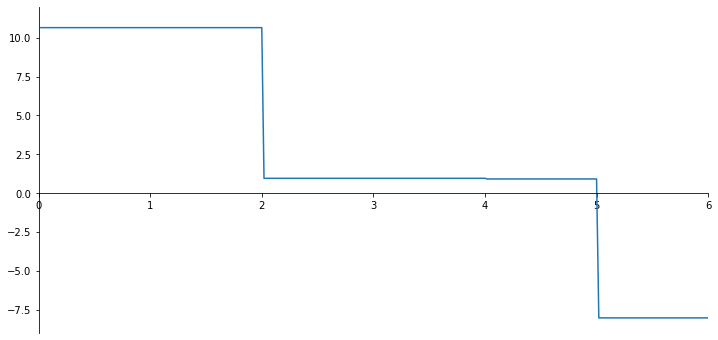

In [70]:
x_val = np.linspace(0, 3*l/2, 301)
V_numpy = sp.lambdify(x,V.subs(solutions).rewrite(sp.Piecewise).simplify()) 
V_list = V_numpy(x_val)
print(V_list[200:202])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 6)
ax.set_ylim(-9, 12)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)

ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val, np.array(V_list)); 

[-0.28169225 -0.45210127]


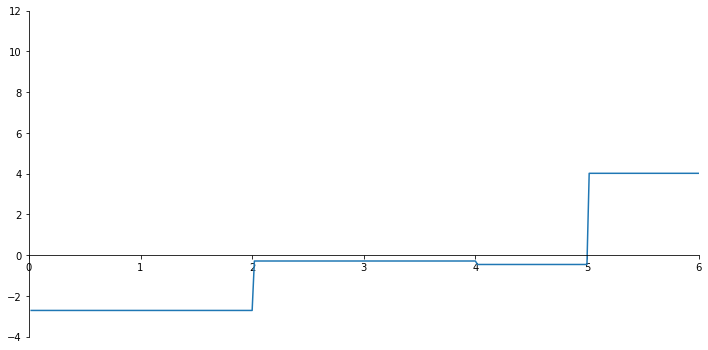

In [71]:
x_val = np.linspace(0, 3*l/2, 301)
N_numpy = sp.lambdify(x,N.subs(solutions).rewrite(sp.Piecewise).simplify()) 
N_list = N_numpy(x_val)

print(N_list[200:202])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 6)
ax.set_ylim(-4, 12)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)

ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val, np.array(N_list));

### iteratie 2

In [72]:
Cv, Cm, Cphi, Cw, Av, Bv, MA, Ah, Cn= sp.symbols('C_v, C_m, C_phi, C_w, A_v, B_v, M_A, A_h, C_n')

# Define qz and qx
DwaL =  0.9468048
DwaR =  0.90420254
NorL = -0.28169225
NorR = -0.45210127
qz1 = sp.nsimplify(-Av * sf(x, 0, -1) + MA* sf(x, 0, -2) + F1 *sf(x, l/2, -1) + DwaL * sf(x, l, -1) * sp.cos(theta)- NorL * sf(x, l, -1) * sp.sin(theta))
qz2 = sp.nsimplify(-Bv * sf(x, (3/2)*l, -1) + F2 *sf(x, (5/4)*l, -1) - DwaR *sf(x, l, -1)* sp.cos(alpha) + NorR * sf(x, l, -1)* sp.sin(alpha) )
qx1 = sp.nsimplify(Ah * sf(x, 0, -1) + DwaL * sf(x, l, -1) * sp.sin(theta)  + NorL * sf(x, l, -1)* sp.cos(theta))
qx2 = sp.nsimplify(-DwaR * sf(x, l, -1)*sp.sin(alpha) -NorR * sf(x, l, -1)* sp.cos(alpha))


# Define V as a function of x
## staaf 1
V1 = sp.cos(theta) * sp.integrate( -qz1 , x)
V2 = sp.integrate(- (sp.sin(theta) * sp.tan(theta) * qx1), x)
## staaf 2
V3 = sp.cos(alpha) * sp.integrate( -qz2 , x)
V4 = sp.integrate(- (sp.sin(alpha) * sp.tan(alpha) * qx2), x)

V =V1 + V2 + V3 + V4 + Cv

# Define M as an integral of V
## staaf 1
M1 = sp.integrate( (V1  / sp.cos(theta)), x)
M2 = sp.integrate( (V2  / sp.cos(theta)), x)
## sfaaf 2
M3 = sp.integrate((V3 / sp.cos(alpha)), x)
M4 = sp.integrate((V4 / sp.cos(alpha)), x)
M  = M1 + M2 + M3+ M4 + Cm

# Define phi as an integral of M
phi = sp.integrate(M, x) + Cphi

# Define W as an integral of -phi
W = sp.integrate(-phi, x) + Cw

N1 = sp.integrate(sp.sin(theta) * (-qx1 + qz1), x) + Cn
N2 = sp.integrate(sp.sin(alpha) * (-qx2 + qz2), x) 
N = N1+ N2 + Cn

In [73]:
eq1 = V.subs(x, -1)
eq2 = M.subs(x, -1)
eq3 = V.subs(x, (3/2)*l + 1)
eq4 = phi.subs(x, 0)
eq5 = W.subs(x, 0)
eq6 = M.subs(x, (3/2)*l)
eq7 = W.subs(x, (3/2)*l)
eq8 = N.subs(x, -0.01)
eq9 = N.subs(x, ((3/2)*l) +1 )
equations = [eq1-0, eq2-0, eq3-0, eq4-0, eq5-0, eq6-0, eq7 -0, eq8-0, eq9-0]
solutions = sp.solve(equations, (Cv, Cm, Cphi, Cw, Av, Bv, MA, Cn, Ah))
display(solutions)

{C_v: 0.0,
 C_m: 0.0,
 C_phi: 0.0,
 C_w: 0.0,
 A_v: 10.9850963259576,
 B_v: 8.99087340809321,
 M_A: 15.9483989566231,
 C_n: 0.0,
 A_h: 0.0420835912550643}

[0.95313212 0.90259026]


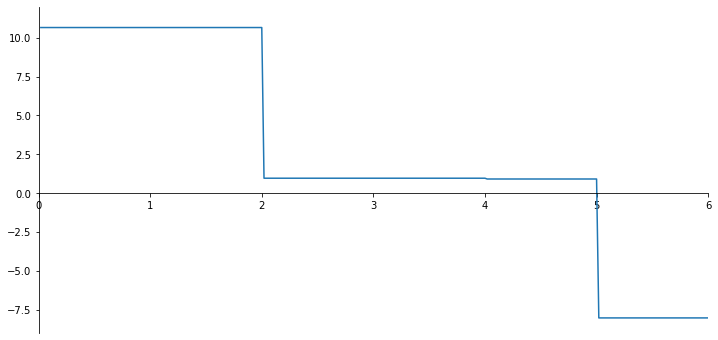

In [74]:
x_val = np.linspace(0, 3*l/2, 301)
V_numpy = sp.lambdify(x,V.subs(solutions).rewrite(sp.Piecewise).simplify()) 
V_list = V_numpy(x_val)
print(V_list[200:202]) 

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 6)
ax.set_ylim(-9, 12)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)

ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val, np.array(V_list)); 

[-0.24912772 -0.45129513]


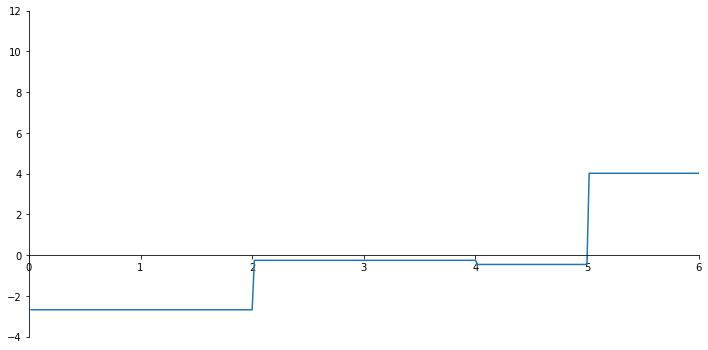

In [75]:
x_val = np.linspace(0, 3*l/2, 301)
N_numpy = sp.lambdify(x,N.subs(solutions).rewrite(sp.Piecewise).simplify()) 
N_list = N_numpy(x_val)

print(N_list[200:202])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 6)
ax.set_ylim(-4, 12)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)

ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val, np.array(N_list));

### Iteratie 3

In [76]:
Cv, Cm, Cphi, Cw, Av, Bv, MA, Ah, Cn= sp.symbols('C_v, C_m, C_phi, C_w, A_v, B_v, M_A, A_h, C_n')

# Define qz and qx
DwaL =  0.95313212
DwaR =  0.90259026
NorL = -0.24912772
NorR = -0.45129513
qz1 = sp.nsimplify(-Av * sf(x, 0, -1) + MA* sf(x, 0, -2) + F1 *sf(x, l/2, -1) + DwaL * sf(x, l, -1) * sp.cos(theta)- NorL * sf(x, l, -1) * sp.sin(theta))
qz2 = sp.nsimplify(-Bv * sf(x, (3/2)*l, -1) + F2 *sf(x, (5/4)*l, -1) - DwaR *sf(x, l, -1)* sp.cos(alpha) + NorR * sf(x, l, -1)* sp.sin(alpha) )
qx1 = sp.nsimplify(Ah * sf(x, 0, -1) + DwaL * sf(x, l, -1) * sp.sin(theta)  + NorL * sf(x, l, -1)* sp.cos(theta))
qx2 = sp.nsimplify(-DwaR * sf(x, l, -1)*sp.sin(alpha) -NorR * sf(x, l, -1)* sp.cos(alpha))


# Define V as a function of x
## staaf 1
V1 = sp.cos(theta) * sp.integrate( -qz1 , x)
V2 = sp.integrate(- (sp.sin(theta) * sp.tan(theta) * qx1), x)
## staaf 2
V3 = sp.cos(alpha) * sp.integrate( -qz2 , x)
V4 = sp.integrate(- (sp.sin(alpha) * sp.tan(alpha) * qx2), x)

V =V1 + V2 + V3 + V4 + Cv

# Define M as an integral of V
## staaf 1
M1 = sp.integrate( (V1  / sp.cos(theta)), x)
M2 = sp.integrate( (V2  / sp.cos(theta)), x)
## sfaaf 2
M3 = sp.integrate((V3 / sp.cos(alpha)), x)
M4 = sp.integrate((V4 / sp.cos(alpha)), x)
M  = M1 + M2 + M3+ M4 + Cm

# Define phi as an integral of M
phi = sp.integrate(M, x) + Cphi

# Define W as an integral of -phi
W = sp.integrate(-phi, x) + Cw

N1 = sp.integrate(sp.sin(theta) * (-qx1 + qz1), x) + Cn
N2 = sp.integrate(sp.sin(alpha) * (-qx2 + qz2), x) 
N = N1+ N2 + Cn

In [77]:
eq1 = V.subs(x, -1)
eq2 = M.subs(x, -1)
eq3 = V.subs(x, (3/2)*l + 1)
eq4 = phi.subs(x, 0)
eq5 = W.subs(x, 0)
eq6 = M.subs(x, (3/2)*l)
eq7 = W.subs(x, (3/2)*l)
eq8 = N.subs(x, -0.01)
eq9 = N.subs(x, ((3/2)*l) +1 )
equations = [eq1-0, eq2-0, eq3-0, eq4-0, eq5-0, eq6-0, eq7 -0, eq8-0, eq9-0]
solutions = sp.solve(equations, (Cv, Cm, Cphi, Cw, Av, Bv, MA, Cn, Ah))
display(solutions)

{C_v: 0.0,
 C_m: 0.0,
 C_phi: 0.0,
 C_w: 0.0,
 A_v: 10.9840850145227,
 B_v: 8.99190939177049,
 M_A: 15.9502774939007,
 C_n: 0.0,
 A_h: 0.00962195189033341}

[0.95411928 0.90166365]


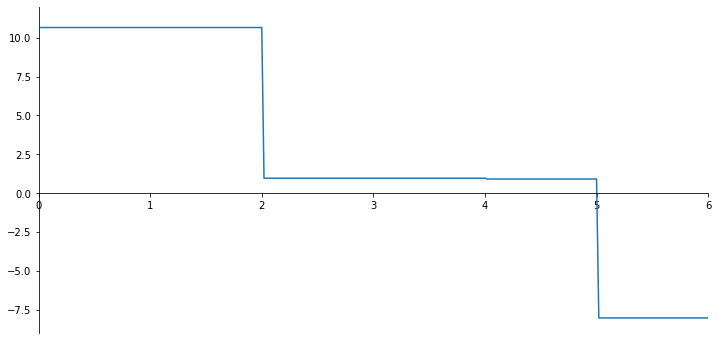

In [78]:
x_val = np.linspace(0, 3*l/2, 301)
V_numpy = sp.lambdify(x,V.subs(solutions).rewrite(sp.Piecewise).simplify()) 
V_list = V_numpy(x_val)
print(V_list[200:202]) 

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 6)
ax.set_ylim(-9, 12)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)

ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val, np.array(V_list)); 

[-0.24100934 -0.45083183]


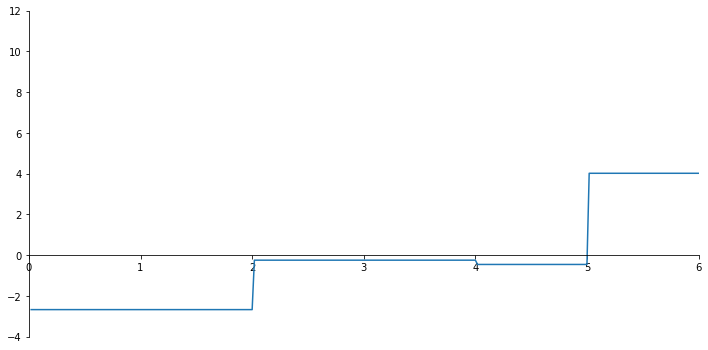

In [79]:
x_val = np.linspace(0, 3*l/2, 301)
N_numpy = sp.lambdify(x,N.subs(solutions).rewrite(sp.Piecewise).simplify()) 
N_list = N_numpy(x_val)

print(N_list[200:202])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 6)
ax.set_ylim(-4, 12)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)

ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val, np.array(N_list));

### Iteratie 4

In [80]:
Cv, Cm, Cphi, Cw, Av, Bv, MA, Ah, Cn= sp.symbols('C_v, C_m, C_phi, C_w, A_v, B_v, M_A, A_h, C_n')

# Define qz and qx
DwaL =  0.95411928
DwaR =  0.90166365
NorL = -0.24100934
NorR = -0.45083183
qz1 = sp.nsimplify(-Av * sf(x, 0, -1) + MA* sf(x, 0, -2) + F1 *sf(x, l/2, -1) + DwaL * sf(x, l, -1) * sp.cos(theta)- NorL * sf(x, l, -1) * sp.sin(theta))
qz2 = sp.nsimplify(-Bv * sf(x, (3/2)*l, -1) + F2 *sf(x, (5/4)*l, -1) - DwaR *sf(x, l, -1)* sp.cos(alpha) + NorR * sf(x, l, -1)* sp.sin(alpha) )
qx1 = sp.nsimplify(Ah * sf(x, 0, -1) + DwaL * sf(x, l, -1) * sp.sin(theta)  + NorL * sf(x, l, -1)* sp.cos(theta))
qx2 = sp.nsimplify(-DwaR * sf(x, l, -1)*sp.sin(alpha) -NorR * sf(x, l, -1)* sp.cos(alpha))


# Define V as a function of x
## staaf 1
V1 = sp.cos(theta) * sp.integrate( -qz1 , x)
V2 = sp.integrate(- (sp.sin(theta) * sp.tan(theta) * qx1), x)
## staaf 2
V3 = sp.cos(alpha) * sp.integrate( -qz2 , x)
V4 = sp.integrate(- (sp.sin(alpha) * sp.tan(alpha) * qx2), x)

V =V1 + V2 + V3 + V4 + Cv

# Define M as an integral of V
## staaf 1
M1 = sp.integrate( (V1  / sp.cos(theta)), x)
M2 = sp.integrate( (V2  / sp.cos(theta)), x)
## sfaaf 2
M3 = sp.integrate((V3 / sp.cos(alpha)), x)
M4 = sp.integrate((V4 / sp.cos(alpha)), x)
M  = M1 + M2 + M3+ M4 + Cm

# Define phi as an integral of M
phi = sp.integrate(M, x) + Cphi

# Define W as an integral of -phi
W = sp.integrate(-phi, x) + Cw

N1 = sp.integrate(sp.sin(theta) * (-qx1 + qz1), x) + Cn
N2 = sp.integrate(sp.sin(alpha) * (-qx2 + qz2), x) 
N = N1 + N2 + Cn

In [81]:
eq1 = V.subs(x, -1)
eq2 = M.subs(x, -1)
eq3 = V.subs(x, (3/2)*l + 1)
eq4 = phi.subs(x, 0)
eq5 = W.subs(x, 0)
eq6 = M.subs(x, (3/2)*l)
eq7 = W.subs(x, (3/2)*l)
eq8 = N.subs(x, -0.01)
eq9 = N.subs(x, ((3/2)*l) +1 )
equations = [eq1-0, eq2-0, eq3-0, eq4-0, eq5-0, eq6-0, eq7 -0, eq8-0, eq9-0]
solutions = sp.solve(equations, (Cv, Cm, Cphi, Cw, Av, Bv, MA, Cn, Ah))
display(solutions)

{C_v: 0.0,
 C_m: 0.0,
 C_phi: 0.0,
 C_w: 0.0,
 A_v: 10.9838786097141,
 B_v: 8.99212083108564,
 M_A: 15.9507502786053,
 C_n: 0.0,
 A_h: 0.00222200751313955}

[0.95436773 0.90147453]


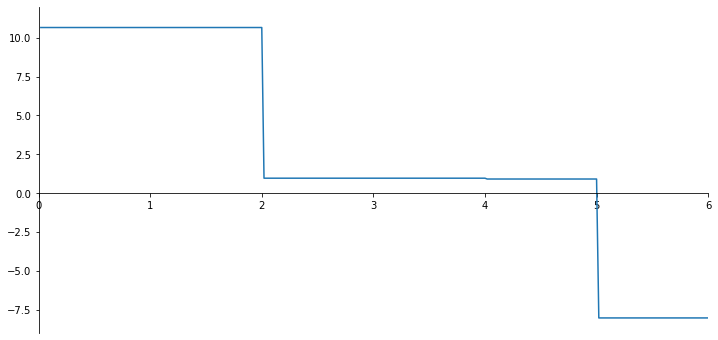

In [82]:
x_val = np.linspace(0, 3*l/2, 301)
V_numpy = sp.lambdify(x,V.subs(solutions).rewrite(sp.Piecewise).simplify()) 
V_list = V_numpy(x_val)
print(V_list[200:202]) 

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 6)
ax.set_ylim(-9, 12)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)

ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val, np.array(V_list)); 

[-0.23916453 -0.45073727]


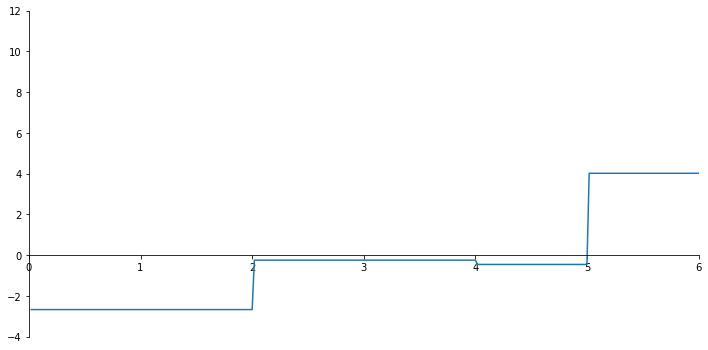

In [83]:
x_val = np.linspace(0, 3*l/2, 301)
N_numpy = sp.lambdify(x,N.subs(solutions).rewrite(sp.Piecewise).simplify()) 
N_list = N_numpy(x_val)

print(N_list[200:202])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 6)
ax.set_ylim(-4, 12)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)

ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val, np.array(N_list));

### Iteratie 5

In [84]:
Cv, Cm, Cphi, Cw, Av, Bv, MA, Ah, Cn= sp.symbols('C_v, C_m, C_phi, C_w, A_v, B_v, M_A, A_h, C_n')

# Define qz and qx
DwaL =  0.95436773
DwaR =  0.90147453
NorL = -0.23916453
NorR = -0.45073727
qz1 = sp.nsimplify(-Av * sf(x, 0, -1) + MA* sf(x, 0, -2) + F1 *sf(x, l/2, -1) + DwaL * sf(x, l, -1) * sp.cos(theta)- NorL * sf(x, l, -1) * sp.sin(theta))
qz2 = sp.nsimplify(-Bv * sf(x, (3/2)*l, -1) + F2 *sf(x, (5/4)*l, -1) - DwaR *sf(x, l, -1)* sp.cos(alpha) + NorR * sf(x, l, -1)* sp.sin(alpha) )
qx1 = sp.nsimplify(Ah * sf(x, 0, -1) + DwaL * sf(x, l, -1) * sp.sin(theta)  + NorL * sf(x, l, -1)* sp.cos(theta))
qx2 = sp.nsimplify(-DwaR * sf(x, l, -1)*sp.sin(alpha) -NorR * sf(x, l, -1)* sp.cos(alpha))


# Define V as a function of x
## staaf 1
V1 = sp.cos(theta) * sp.integrate( -qz1 , x)
V2 = sp.integrate(- (sp.sin(theta) * sp.tan(theta) * qx1), x)
## staaf 2
V3 = sp.cos(alpha) * sp.integrate( -qz2 , x)
V4 = sp.integrate(- (sp.sin(alpha) * sp.tan(alpha) * qx2), x)

V =V1 + V2 + V3 + V4 + Cv

# Define M as an integral of V
## staaf 1
M1 = sp.integrate( (V1  / sp.cos(theta)), x)
M2 = sp.integrate( (V2  / sp.cos(theta)), x)
## sfaaf 2
M3 = sp.integrate((V3 / sp.cos(alpha)), x)
M4 = sp.integrate((V4 / sp.cos(alpha)), x)
M  = M1 + M2 + M3+ M4 + Cm

# Define phi as an integral of M
phi = sp.integrate(M, x) + Cphi

# Define W as an integral of -phi
W = sp.integrate(-phi, x) + Cw

N1 = sp.integrate(sp.sin(theta) * (-qx1 + qz1), x) + Cn
N2 = sp.integrate(sp.sin(alpha) * (-qx2 + qz2), x) 
N = N1 + N2 + Cn

In [85]:
eq1 = V.subs(x, -1)
eq2 = M.subs(x, -1)
eq3 = V.subs(x, (3/2)*l + 1)
eq4 = phi.subs(x, 0)
eq5 = W.subs(x, 0)
eq6 = M.subs(x, (3/2)*l)
eq7 = W.subs(x, (3/2)*l)
eq8 = N.subs(x, -0.01)
eq9 = N.subs(x, ((3/2)*l) +1 )
equations = [eq1-0, eq2-0, eq3-0, eq4-0, eq5-0, eq6-0, eq7 -0, eq8-0, eq9-0]
solutions = sp.solve(equations, (Cv, Cm, Cphi, Cw, Av, Bv, MA, Cn, Ah))
display(solutions)

{C_v: 0.0,
 C_m: 0.0,
 C_phi: 0.0,
 C_w: 0.0,
 A_v: 10.9838298415814,
 B_v: 8.99217079631337,
 M_A: 15.9508575377216,
 C_n: 0.0,
 A_h: 0.000512138382148610}

[0.95442409 0.90142984]


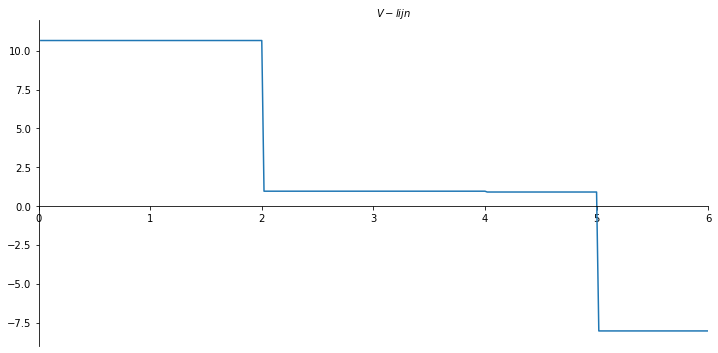

In [86]:
x_val = np.linspace(0, 3*l/2, 301)
V_numpy = sp.lambdify(x,V.subs(solutions).rewrite(sp.Piecewise).simplify()) 
V_list = V_numpy(x_val)
print(V_list[200:202]) 

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 6)
ax.set_ylim(-9, 12)
ax.set_xlabel("$V-lijn$")
ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)

ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val, np.array(V_list))
plt.savefig('V_lijnvoorbeeld4', dpi=450);

[-0.238738   -0.45071492]


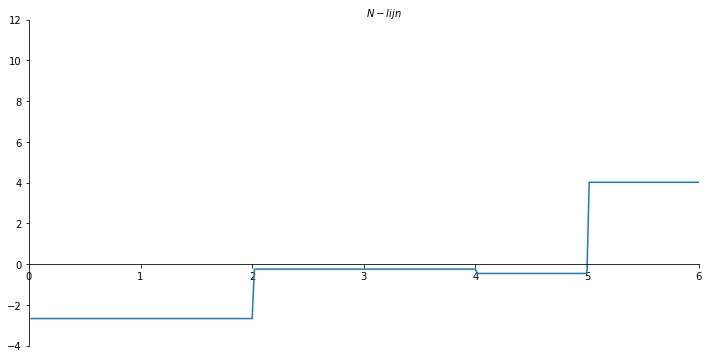

In [87]:
x_val = np.linspace(0, 3*l/2, 301)
N_numpy = sp.lambdify(x,N.subs(solutions).rewrite(sp.Piecewise).simplify()) 
N_list = N_numpy(x_val)

print(N_list[200:202])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 6)
ax.set_ylim(-4, 12)
ax.set_xlabel("$N-lijn$")
ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)

ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val, np.array(N_list))
plt.savefig('N_lijnvoorbeeld4', dpi=450);

In [88]:
x_val1 = np.linspace(0, l, 301)
M_numpy1 = sp.lambdify(x,M.subs(solutions).rewrite(sp.Piecewise).simplify()) 
M_list1 = M_numpy1(x_val1)

x_val2 = np.linspace(l, 3*l/2, 301)
M_numpy2 = sp.lambdify(x,M.subs(solutions).rewrite(sp.Piecewise).simplify()) 
M_list2 = M_numpy2(x_val2)

''

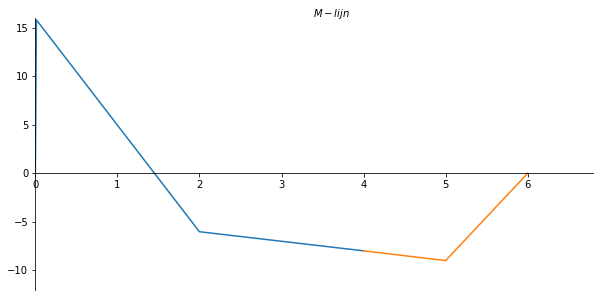

In [89]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 6.8)
ax.set_ylim(-12, 16)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$M-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val1,  -np.array(M_list1) , label='M-lijn')
ax.plot(x_val2,  -np.array(M_list2) , label='M-lijn');
plt.savefig('M_lijnvoorbeeld4', dpi=450)
;

In [90]:
x_val = np.linspace(0, 3*l/2, 901)
phi_numpy = sp.lambdify(x,phi.subs(solutions).rewrite(sp.Piecewise).simplify()) #substitute full solution, make python function of formula
phi_list = phi_numpy(x_val)

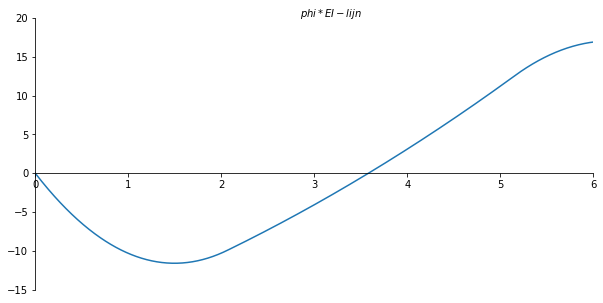

In [91]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 6)
ax.set_ylim(-15, 20)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$phi*EI-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta), np.array(phi_list) , label='phi-lijn')
plt.savefig('phi_lijnvoorbeeld4', dpi=450);

In [92]:
x_val = np.linspace(0, 3*l/2, 901)
W_numpy = sp.lambdify(x,W.subs(solutions).rewrite(sp.Piecewise).simplify())
W_list = W_numpy(x_val)

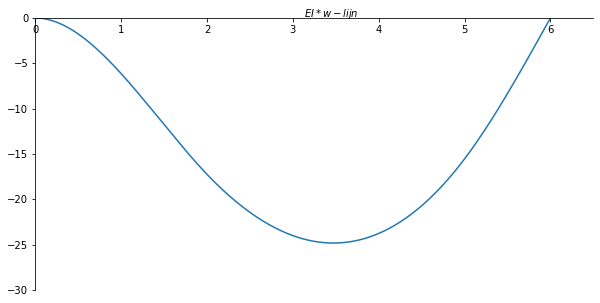

In [93]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 6.5)
ax.set_ylim(-30, 0)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$EI * w-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val, - np.array(W_list) , label='w-lijn')
plt.savefig('w_lijnvoorbeeld4', dpi=450);

In [94]:
## het oplossen van differentiaal vergelijking
## in x-richting
# Define the symbols
cv, cn, qx, qz, theta = sp.symbols('cv, cn, qx, qz, theta')  ## cv = dv/dx, cn = dn/dx

# Define the equations
eq1 = (qx* sp.tan(theta)) + (sp.sin(theta) * cv) + (sp.cos(theta) * cn)
eq2 = (qz) + (sp.cos(theta) * cv) - (sp.sin(theta) * cn)

# Solve the system of equations
solution = sp.solve((eq1, eq2), (cv, cn))

# Display the solution
print("Solution in the x-direction:")
display("dV/dx =", solution[cv])
display("dN/dx =", solution[cn])

Solution in the x-direction:


'dV/dx ='

-qx*sin(theta)*tan(theta) - qz*cos(theta)

'dN/dx ='

(-qx + qz)*sin(theta)